# Problem Statement

## Features

In [ ]:
# Importing all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVR


In [2]:
df_train = pd.read_csv('D:\\python\\Flight_Ticket_Participant_Datasets\\Data_Train.csv')

In [3]:
df_test = pd.read_csv('D:\\python\\Flight_Ticket_Participant_Datasets\\Test_set.csv')

In [4]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_train['Route'].nunique()

128

In [7]:
df_test['Route'].nunique()

100

In [8]:
df = df_train.append(df_test, sort = False)

In [9]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [10]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [11]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [12]:
df.shape

(13354, 11)

# Feature Engineering And Analysis

In [ ]:
# sweet viz is used for exploratry data analysis and stastical understanding

In [13]:
my_report = sweetviz.analyze([df,'DataFrame'],target_feat='Price')

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [14]:
my_report.show_html('Report.html')

In [15]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year']  = df['Date_of_Journey'].str.split('/').str[2]

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [17]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [18]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [19]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [20]:
df = df.drop(['Date_of_Journey'],axis=1)

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [22]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [24]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [25]:
df['Route'].mode()

0    DEL ? BOM ? COK
dtype: object

In [26]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

In [27]:
df[(df.Source == 'Delhi') & (df.Destination == 'Cochin') & (df.Airline == 'Air India') & (df.Dep_Time == '09:45')]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
10,Air India,Delhi,Cochin,DEL ? BLR ? COK,09:45,23:00,13h 15m,1 stop,No info,8907.0,1,6,2019
738,Air India,Delhi,Cochin,DEL ? BLR ? COK,09:45,23:00,13h 15m,1 stop,No info,8907.0,27,5,2019
1336,Air India,Delhi,Cochin,DEL ? HYD ? MAA ? COK,09:45,09:25,23h 40m,2 stops,No info,10660.0,9,3,2019
1616,Air India,Delhi,Cochin,DEL ? MAA ? COK,09:45,09:25,23h 40m,1 stop,No info,7480.0,24,5,2019
1679,Air India,Delhi,Cochin,DEL ? HYD ? MAA ? COK,09:45,09:25,23h 40m,2 stops,No info,10975.0,3,6,2019
1862,Air India,Delhi,Cochin,DEL ? HYD ? MAA ? COK,09:45,09:25,23h 40m,2 stops,No info,10975.0,27,6,2019
2343,Air India,Delhi,Cochin,DEL ? HYD ? MAA ? COK,09:45,09:25,23h 40m,2 stops,No info,10975.0,15,5,2019
2554,Air India,Delhi,Cochin,DEL ? MAA ? COK,09:45,09:25,23h 40m,1 stop,No info,7480.0,15,5,2019
3185,Air India,Delhi,Cochin,DEL ? BLR ? COK,09:45,08:15,22h 30m,1 stop,No info,8991.0,12,6,2019
3272,Air India,Delhi,Cochin,DEL ? HYD ? MAA ? COK,09:45,09:25,23h 40m,2 stops,No info,7090.0,27,3,2019


In [28]:
# Inserting most repaeted route and total stops in nan value

In [29]:
df['Total_Stops'] = df['Total_Stops'].fillna('1 stop')

In [30]:
df['Route'] = df['Route'].fillna('DEL ? BOM ? COK')

In [31]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

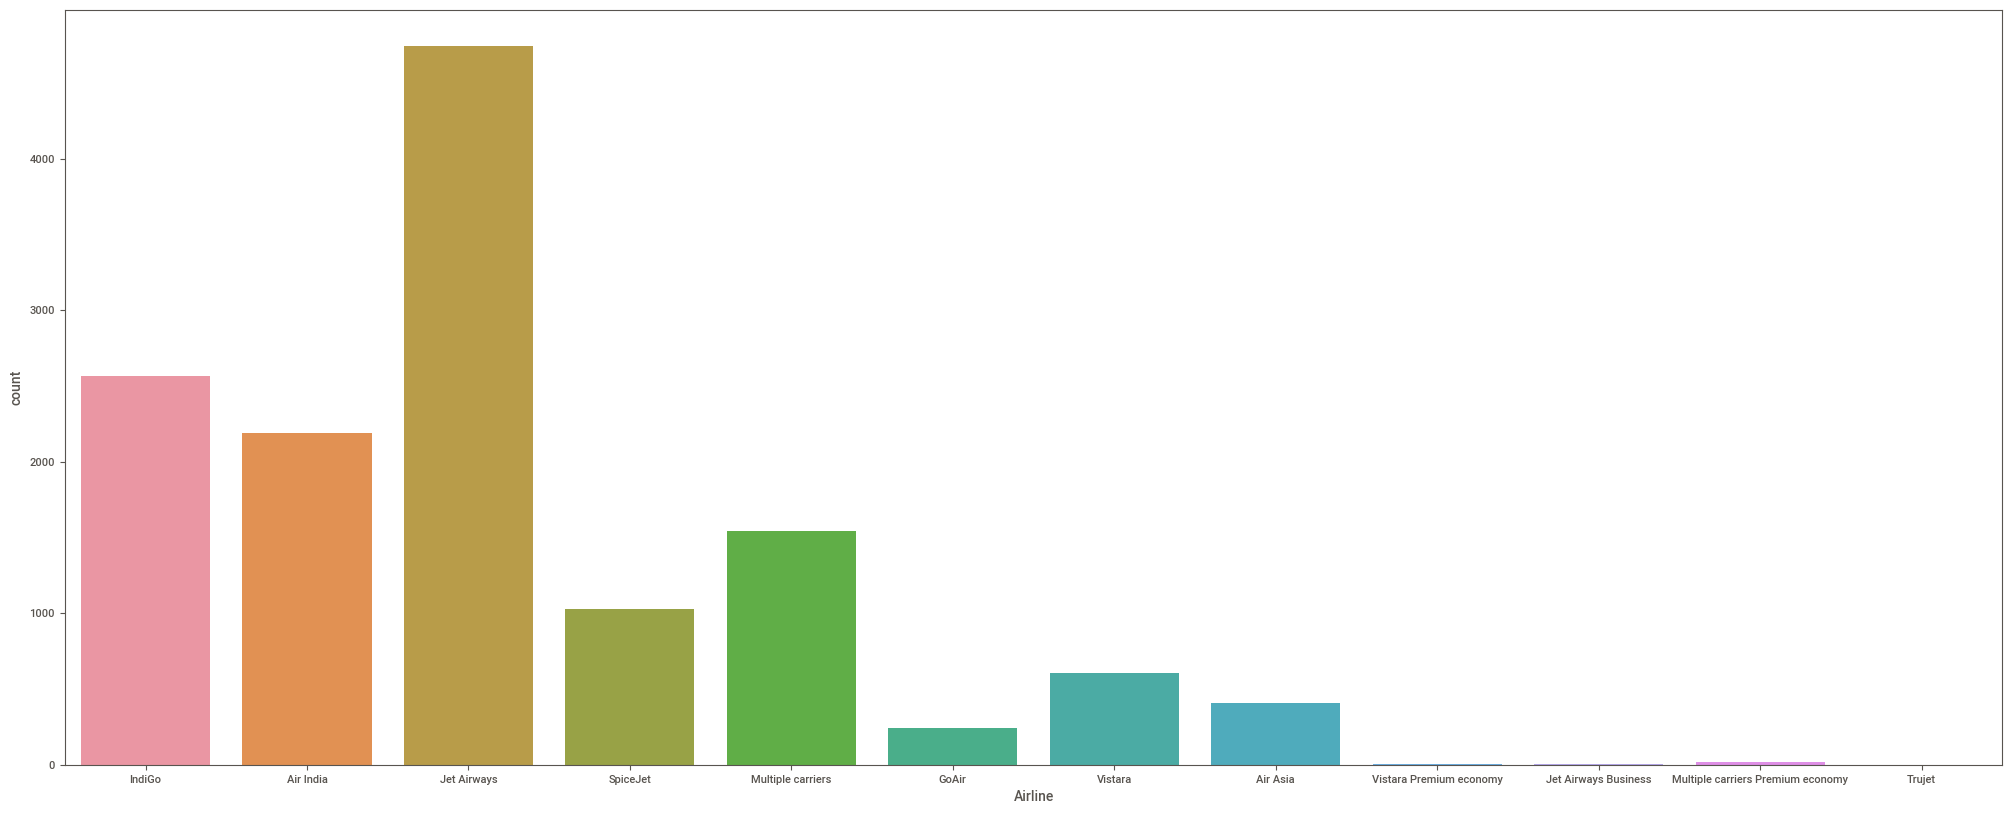

In [32]:
f, ax = plt.subplots(figsize=(25, 10))
sns.countplot(df['Airline'])

In [33]:
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [34]:
df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [35]:
df['Total_Stops'] = df['Total_Stops'].replace('non-stop','0 stop')

In [36]:
pd.crosstab(df['Source'],df['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1582,0,0,1170
Chennai,0,0,0,0,456,0
Delhi,0,5682,0,0,0,0
Kolkata,3581,0,0,0,0,0
Mumbai,0,0,0,883,0,0


## As we can see here most no. of flights between delhi and cochin

In [37]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [38]:
# max price of ticket and there info

In [39]:
df.loc[df['Price'].idxmax()]

Airline            Jet Airways Business
Source                         Banglore
Destination                   New Delhi
Route                   BLR ? BOM ? DEL
Dep_Time                          05:45
Arrival_Time                      11:25
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          Business class
Price                             79512
Date                                  1
Month                                 3
Year                               2019
Name: 2924, dtype: object

In [40]:
# min price of ticetand there info

In [41]:
df.loc[df['Price'].idxmin()]

Airline             SpiceJet
Source                Mumbai
Destination        Hyderabad
Route              BOM ? HYD
Dep_Time               22:45
Arrival_Time           00:10
Duration              1h 25m
Total_Stops           0 stop
Additional_Info      No info
Price                   1759
Date                      21
Month                      3
Year                    2019
Name: 4066, dtype: object

In [42]:
df['stop'] = df['Total_Stops'].str.split(' ').str[0]
# df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [43]:
df = df.drop(['Total_Stops'], axis = 1)

In [44]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,stop
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25,23h 55m,No info,NaN,6,6,2019,1
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,No info,NaN,27,3,2019,0
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25,6h 35m,No info,NaN,6,3,2019,1
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,No info,NaN,6,3,2019,1


In [45]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
stop                object
dtype: object

In [46]:
df['stop'] = df['stop'].astype('int')

In [47]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
stop                 int32
dtype: object

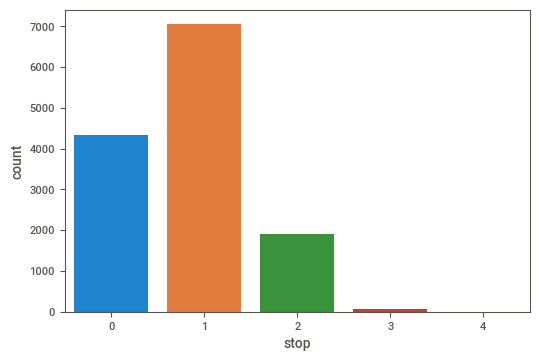

In [48]:
sns.countplot(df['stop'])

# there are more flight which have one stop

In [49]:
pd.crosstab(df['Airline'],df['stop'])

stop,0,1,2,3,4
Airline,,,,,
Air Asia,231,160,14,0,0
Air India,516,664,964,46,2
GoAir,117,123,0,0,0
IndiGo,1521,1017,26,0,0
Jet Airways,766,3137,843,0,0
Jet Airways Business,1,5,2,0,0
Multiple carriers,0,1483,50,10,0
Multiple carriers Premium economy,0,16,0,0,0
SpiceJet,846,180,0,0,0


In [50]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min'] = df['Arrival_Time'].str.split(':').str[1]

In [51]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype('int')
df['Arrival_min'] = df['Arrival_min'].astype('int')

In [52]:
df = df.drop(['Arrival_Time'],axis=1)

In [53]:
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_min'] = df['Dep_Time'].str.split(':').str[1]

In [54]:
df['Departure_Hour'] = df['Departure_Hour'].astype('int')
df['Departure_min'] = df['Departure_min'].astype('int')

In [55]:
df = df.drop(['Dep_Time'],axis=1)

In [56]:
df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,stop,Arrival_Hour,Arrival_min,Departure_Hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [57]:
df['Route_1'] = df['Route'].str.split('?').str[0]
df['Route_2'] = df['Route'].str.split('?').str[1]
df['Route_3'] = df['Route'].str.split('?').str[2]
df['Route_4'] = df['Route'].str.split('?').str[3]
df['Route_5'] = df['Route'].str.split('?').str[4]

In [58]:
df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,stop,Arrival_Hour,Arrival_min,Departure_Hour,Departure_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [59]:
df['Price'].fillna((df['Price'].mean()),inplace=True)

In [60]:
df['Route_1'].fillna('None',inplace = True)
df['Route_2'].fillna('None',inplace = True)
df['Route_3'].fillna('None',inplace = True)
df['Route_4'].fillna('None',inplace = True)
df['Route_5'].fillna('None',inplace = True)

In [61]:
df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,stop,Arrival_Hour,Arrival_min,Departure_Hour,Departure_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [62]:
df=df.drop(['Route'],axis=1)

In [63]:
df = df.drop(['Duration'],axis=1)

In [64]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,stop,Arrival_Hour,Arrival_min,Departure_Hour,Departure_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [65]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
stop               0
Arrival_Hour       0
Arrival_min        0
Departure_Hour     0
Departure_min      0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [67]:
df['Airline'] = encoder.fit_transform(df['Airline'])
df['Source'] = encoder.fit_transform(df['Source'])
df['Destination'] = encoder.fit_transform(df['Destination'])
df['Additional_Info'] = encoder.fit_transform(df['Additional_Info'])
df['Route_1'] = encoder.fit_transform(df['Route_1'])
df['Route_2'] = encoder.fit_transform(df['Route_2'])
df['Route_3'] = encoder.fit_transform(df['Route_3'])
df['Route_4'] = encoder.fit_transform(df['Route_4'])
df['Route_5'] = encoder.fit_transform(df['Route_5'])

In [68]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,stop,Arrival_Hour,Arrival_min,Departure_Hour,Departure_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,30,13,5
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,5
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,5
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,13,5
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,13,5


# Feature Selection

In [69]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [70]:
df_train = df[0:10683]
df_test = df[10683:]

In [71]:
x=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [72]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [73]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(train_x,train_y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [74]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [75]:
selected_features = train_x.columns[(model.get_support())] 

In [76]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'stop', 'Arrival_Hour', 'Arrival_min', 'Departure_Hour',
       'Departure_min', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [77]:
train_x = train_x.drop(['Year'],axis=1)

In [78]:
test_x = test_x.drop(['Year'],axis=1)

In [79]:
test_x.shape

(3205, 16)

In [80]:
train_x.shape

(7478, 16)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [82]:
train_x=scaler.fit_transform(train_x)
test_x=scaler.fit_transform(test_x)

In [83]:
train_x.shape

(7478, 16)

In [84]:
train_y

7106     4423.0
7904     7480.0
4861    10919.0
9375     6093.0
155     10697.0
         ...   
9225     7594.0
4859    10651.0
3264    17024.0
9845    12373.0
2732    13067.0
Name: Price, Length: 7478, dtype: float64

In [85]:
# train_y = train_y.reshape((len(train_y)),1)

In [86]:
# train_y= scaler.fit_transform(train_y)

In [87]:
train_y = train_y.ravel()

In [88]:

pd.DataFrame(train_x).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.704130,-1.655666,0.386262,0.505350,-0.891244,-0.614887,-1.217232,-0.773272,0.618439,-1.293584,1.635767,-1.671485,0.138225,1.391127,0.404213,0.066413
1,-1.271134,0.042348,-0.294178,0.505350,-1.484011,1.105647,0.269127,-1.064546,1.529827,-1.293584,-0.493713,0.813972,3.528476,-0.644971,0.404213,0.066413
2,0.003979,0.042348,-0.294178,-1.984661,-0.179923,1.105647,1.755486,-0.190723,0.618439,0.273018,0.571027,0.813972,2.775087,-0.814645,-2.330341,0.066413
3,-0.421059,0.042348,-0.294178,0.505350,0.175738,1.105647,0.269127,1.120012,-1.508133,-1.119517,0.837212,0.813972,-0.615164,-0.644971,0.404213,0.066413
4,-1.271134,0.891355,-0.974617,0.505350,-0.535583,0.245380,1.755486,-0.918909,1.833623,-0.771383,-0.227528,-0.014513,2.021698,-0.814645,-3.013979,0.066413
5,0.854054,0.042348,-0.294178,0.505350,1.598380,-1.475155,0.269127,-1.792732,0.618439,0.795219,1.103397,0.813972,-0.615164,-0.644971,0.404213,0.066413
6,-0.421059,0.042348,-0.294178,0.505350,-0.535583,-0.614887,0.269127,-1.792732,0.314643,-0.597316,-0.493713,0.813972,-0.615164,-0.644971,0.404213,0.066413
7,-1.271134,0.891355,-0.974617,0.505350,-0.891244,0.245380,0.269127,-0.918909,1.833623,-0.597316,0.038657,-0.014513,-0.615164,-0.899483,0.404213,0.066413
8,-0.421059,-0.806659,1.747141,0.505350,1.242719,0.245380,-1.217232,-0.481997,-0.596745,-0.945450,1.635767,1.642458,-0.489599,1.391127,0.404213,0.066413
9,0.003979,0.891355,-0.974617,-1.984661,-1.484011,0.245380,0.269127,-0.773272,-0.596745,0.273018,-1.026083,-0.014513,-0.615164,-0.899483,0.404213,0.066413


In [89]:
pd.DataFrame(train_y).head()

,0
0,4423.0
1,7480.0
2,10919.0
3,6093.0
4,10697.0


In [90]:
# Applying Random Forest

In [91]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [92]:
rf_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
         'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [93]:
rf = RandomForestRegressor()

In [94]:
best_rf_tree=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,n_jobs=-1,cv=3,scoring='neg_mean_squared_error')

In [95]:
best_rf_tree.fit(train_x,train_y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [97]:
y_pred = best_rf_tree.predict(test_x)

In [99]:
best_rf_tree.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [100]:
best_rf_tree.best_score_

-2766587.450261322

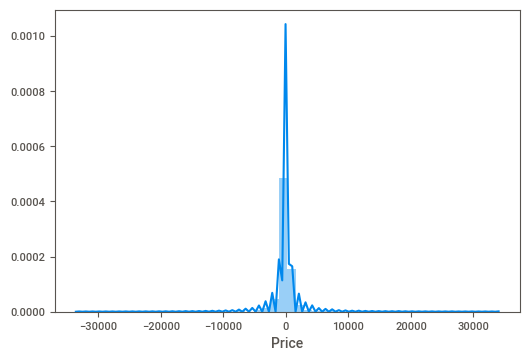

In [101]:
sns.distplot(test_y-y_pred)

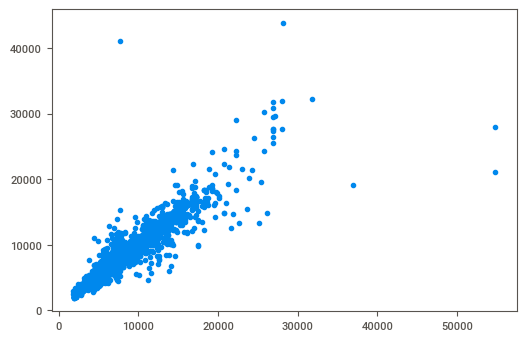

In [102]:
plt.scatter(test_y,y_pred)

In [118]:
# Applying XG Boost

In [106]:
import xgboost
from xgboost.sklearn import XGBClassifier,XGBRegressor

In [107]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
min_child_width = [i for i in range(1,6,2)]
gamma = [i/10.0 for i in range(0,5)]
subsample = [i/10.0 for i in range(6,10)]
colsample_bytree=[i/10.0 for i in range(6,10)]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100]
learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [108]:
random_grid = {'n_estimators': n_estimators,
               
              'min_child_weight':min_child_width,
              'gamma':gamma,
               'subsample':subsample,
               'colsample_bytree':colsample_bytree,
               'reg_alpha':reg_alpha,
               'learning_rate': learning_rate
              }

In [109]:
XG = XGBRegressor()

In [110]:
XG_random = RandomizedSearchCV(estimator=XG,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [111]:
XG_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.1min finished


[21:09:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'lear

In [112]:
XG_random.best_params_

{'subsample': 0.9,
 'reg_alpha': 1e-05,
 'n_estimators': 1100,
 'min_child_weight': 1,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.9}

In [113]:
XG_random.best_score_

0.8946983091522687

In [114]:
y_pred = XG_random.predict(test_x)

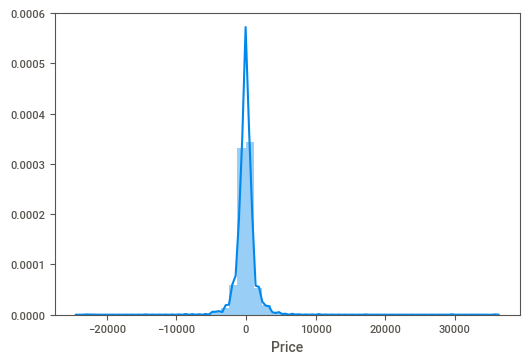

In [115]:
sns.distplot(test_y-y_pred)

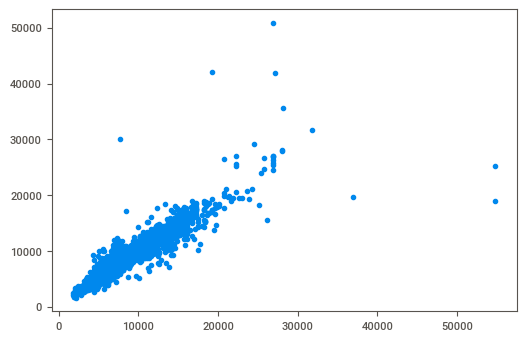

In [116]:
plt.scatter(test_y,y_pred)